<a href="https://colab.research.google.com/github/mariamamgad8/ML-project/blob/main/K_means_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# **Step 1: Load Real Dataset from Kaggle**

In [3]:
# Load and preprocess Iris dataset
iris = load_iris()
X = iris.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Step 2: Build the K-Means algorithm**

In [4]:
class KMeansScratch:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4, random_state=42):
        self.k = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels = None
        self.inertia_ = None  # Sum of squared distances to centroids

    def _initialize_centroids(self, X):
        """K-means++ initialization for better convergence."""
        np.random.seed(self.random_state)
        centroids = [X[np.random.randint(X.shape[0])]]

        for _ in range(1, self.k):
            distances = np.array([min([np.linalg.norm(x - c)**2 for c in centroids]) for x in X])
            probabilities = distances / distances.sum()
            cumulative_prob = probabilities.cumsum()
            r = np.random.rand()

            for j, p in enumerate(cumulative_prob):
                if r < p:
                    centroids.append(X[j])
                    break
        return np.array(centroids)

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)

        for i in range(self.max_iter):
            # Assign clusters (vectorized)
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)

            # Update centroids
            new_centroids = np.array([X[self.labels == k].mean(axis=0) for k in range(self.k)])

            # Check convergence
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break

            self.centroids = new_centroids

        # Compute inertia (within-cluster sum of squares)
        self.inertia_ = sum(np.min(distances, axis=1) ** 2)

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# **Step 3: Define core helper functions**

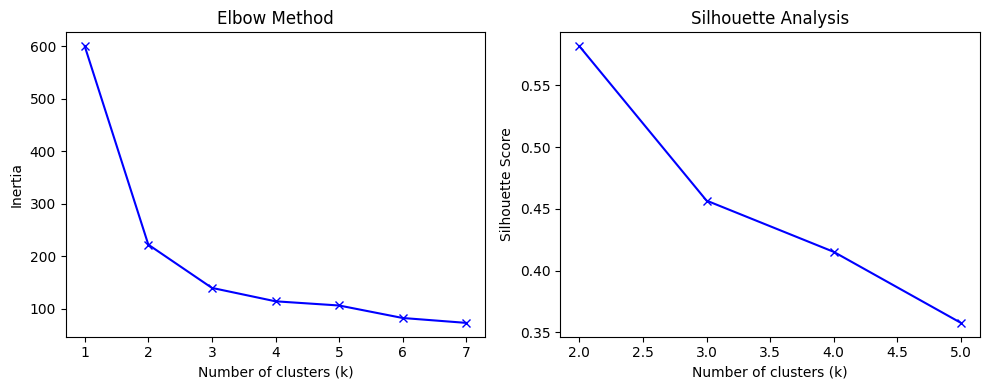

In [6]:
# Elbow Method to find optimal k
inertias = []
k_range = range(1, 8)
for k in k_range:
    kmeans = KMeansScratch(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Silhouette Analysis
silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeansScratch(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels)
    silhouette_scores.append(score)

plt.subplot(1, 2, 2)
plt.plot(range(2, 6), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()



# **Step 4: Train and visualize results**

In [7]:
# Final clustering with optimal k (k=3 for Iris)
optimal_k = 3
kmeans = KMeansScratch(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

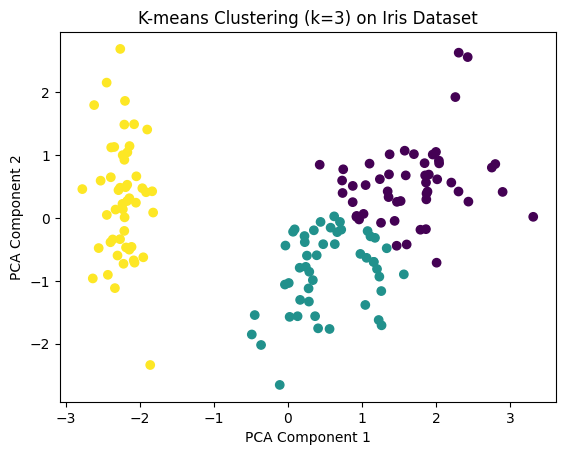

Inertia (SSE): 140.08
Silhouette Score: 0.46


In [8]:
# Visualize clusters (using PCA for 2D projection)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis')
plt.title(f"K-means Clustering (k={optimal_k}) on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Print metrics
print(f"Inertia (SSE): {kmeans.inertia_:.2f}")
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans.labels):.2f}")